In [63]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [64]:
print(torch.randn(1,1,224,224)[0][0].shape)

torch.Size([224, 224])


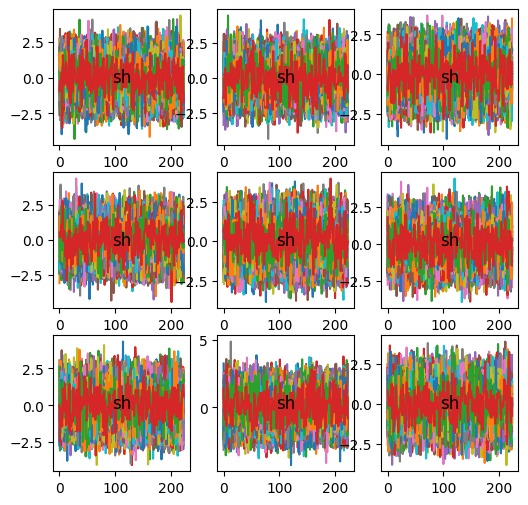

In [69]:
fig,ax = plt.subplots(3,3,figsize=(6,6))
ax[0,0].plot(torch.randn([1,1,224,224])[0][0])
ax[0,1].plot(torch.randn([1,1,224,224])[0][0])
ax[1,0].plot(torch.randn([1,1,224,224])[0][0])
ax[1,1].plot(torch.randn([1,1,224,224])[0][0])
ax[2,0].plot(torch.randn([1,1,224,224])[0][0])
ax[2,1].plot(torch.randn([1,1,224,224])[0][0])
ax[2,2].plot(torch.randn([1,1,224,224])[0][0])
ax[0,2].plot(torch.randn([1,1,224,224])[0][0])
ax[1,2].plot(torch.randn([1,1,224,224])[0][0])

for i in range(3):
        for j in range(3):
            ax[i,j].text(0.5,0.5, 'sh',transform=ax[i,j].transAxes , fontsize=12, ha='center', va='center')

# plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [32]:
from torchvision import transforms
import random
import torch
import numpy as np

def image_preprocess(image, image_size = 224, p_flip = 0.5, p_rotate = 90, seed = 1):

    if isinstance(image, np.ndarray):
        image = np.nan_to_num(image, nan=0.0)
        transform = transforms.Compose([
            transforms.ToTensor(),
        ])
        image = transform(image)
    elif isinstance(image, torch.Tensor):
        image = image.unsqueeze(0)
    else:
        raise ValueError('image should be numpy array or torch tensor')
    
    random.seed(seed)
    torch.manual_seed(seed)
    transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.RandomHorizontalFlip(p_flip),
            transforms.RandomVerticalFlip(p_flip),
            transforms.RandomRotation(p_rotate),
        ])
    image = transform(image)
    return image

image_1 = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
image_2 = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
seed = 4
image_1 = image_preprocess(image_1, seed = seed, image_size=4)
image_2 = image_preprocess(image_2, seed = seed, image_size=4)
print(image_1)
print(image_2)

seed = 0
image_1 = image_preprocess(image_1, seed = seed, image_size=4)
image_2 = image_preprocess(image_2, seed = seed, image_size=4)
print(image_1)
print(image_2)



tensor([[[7, 5, 3, 1],
         [8, 6, 4, 2],
         [8, 6, 4, 2],
         [9, 7, 5, 3]]])
tensor([[[7, 5, 3, 1],
         [8, 6, 4, 2],
         [8, 6, 4, 2],
         [9, 7, 5, 3]]])
tensor([[[[3, 2, 2, 1],
          [5, 4, 4, 3],
          [7, 6, 6, 5],
          [9, 8, 8, 7]]]])
tensor([[[[3, 2, 2, 1],
          [5, 4, 4, 3],
          [7, 6, 6, 5],
          [9, 8, 8, 7]]]])


In [4]:
from datetime import datetime, timedelta
import pickle
from Data.utils import get_modal_dir
import os
def transfer_id_to_date(date_id,y_start=2010, m_start = 5, d_start = 1, y_end=2024, m_end = 6, d_end = 30):
    start_date = datetime(y_start, m_start, d_start)
    end_date = datetime(y_end, m_end, d_end)
    if date_id < 0 or date_id > (end_date - start_date).days*24*60:
        raise ValueError(f'date_id out of range, should be in 0 to {(end_date - start_date).days}')
    # current_date = start_date + timedelta(days=date_id//(24*60))
    current_date = start_date + timedelta(minutes=date_id)

    return current_date

def transfer_date_to_id(y_now, m_now, d_now, y_start=2010, m_start = 5, d_start = 1, y_end=2024, m_end = 6, d_end = 30):
    start_date = datetime(y_start, m_start, d_start)
    end_date = datetime(y_end, m_end, d_end)
    current_date = datetime(y_now, m_now, d_now)

    if current_date < start_date or current_date > end_date:
        raise ValueError(f'current_date out of range, should be in {start_date} to {end_date}')
    date_id = (current_date - start_date).days
    date_id *= 24*60
    return date_id


a = transfer_date_to_id(2010, 5, 14)
print(a)

with open('Data/idx_list/magnet_exist_idx.pkl', 'rb') as f:
    idx_list = pickle.load(f)
print(idx_list[a])

path_fits, path_pt = get_modal_dir('magnet', a)
print(path_fits)
print(path_pt)

print(os.path.isfile(path_fits), os.path.isfile(path_pt))

18720
False
/mnt/nas/home/huxing/202407/nas/data/hmi/fits/hmi.M_720s.20100514_000000_TAI.fits
/mnt/nas/home/huxing/202407/nas/data/hmi/magnet_pt/2010/05/14/hmi.M_720s.20100514_000000_TAI.pt
True False


In [6]:
print(transfer_id_to_date(4400000))
print(transfer_id_to_date(5000000))

2018-09-11 13:20:00
2019-11-02 05:20:00


In [4]:
import sunpy.map
from sunpy.coordinates import frames,SphericalScreen

import astropy.units as u
from astropy.coordinates import SkyCoord

from Data.utils import get_modal_dir,transfer_id_to_date,transfer_date_to_id
import matplotlib.pyplot as plt


/home/huxing/miniconda3/envs/ctf_test/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [219]:
import torch
id = transfer_date_to_id(2011,1,1)
fits_magnet,pt_magnet = get_modal_dir("magnet",date_id=id)

a = torch.load(pt_magnet)
a.dtype

torch.float64

In [5]:
id = transfer_date_to_id(2011,1,1)
fits_magnet,_ = get_modal_dir("magnet",date_id=id)
fits_magnet = sunpy.map.Map(fits_magnet)

fits_0094,_ = get_modal_dir("0094",date_id=id)
fits_0094 = sunpy.map.Map(fits_0094)


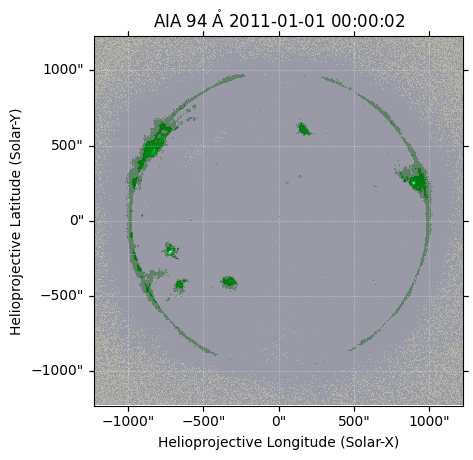

In [28]:

fits_0094.plot_settings['cmap'] = 'hmimag'
fits_0094.plot_settings['norm'] = plt.Normalize(-1000, 1000)
fits_0094.plot()

In [43]:
print(fits_0094.heliographic_latitude)
print(fits_0094.heliographic_longitude)

-2d58m28.38s
0d03m56.63597945s


In [131]:
print('reference date',fits_0094.reference_date)
print('reference pixel',fits_0094.reference_pixel)
print('reference coordinate',fits_0094.reference_coordinate)

print('heliographic latitude',fits_0094.heliographic_latitude)  #observer heliographic latitude
print('heliographic longitude',fits_0094.heliographic_longitude) # observer heligraphic longitude
print('observer coordinate:',fits_0094.observer_coordinate) # observer coordinate

print('coordinate system',fits_0094.coordinate_system)
print('coordinate frame',fits_0094.coordinate_frame)

reference date 2011-01-01T00:00:02.120
reference pixel PixelPair(x=<Quantity 511.5 pix>, y=<Quantity 511.5 pix>)
reference coordinate <SkyCoord (Helioprojective: obstime=2011-01-01T00:00:02.120, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-01-01T00:00:02.120, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.06573222, -2.97455, 1.47100663e+11)>): (Tx, Ty) in arcsec
    (0., 0.)>
heliographic latitude -2d58m28.38s
heliographic longitude 0d03m56.63597945s
observer coordinate: <SkyCoord (HeliographicStonyhurst: obstime=2011-01-01T00:00:02.120, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.06573222, -2.97455, 1.47100663e+11)>
coordinate system SpatialPair(axis1='HPLN-TAN', axis2='HPLT-TAN')
coordinate frame <Helioprojective Frame (obstime=2011-01-01T00:00:02.120, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-01-01T00:00:02.120, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.06573222, -2.

In [130]:
helioprojective_coord = SkyCoord(
    Tx=-1227.58550595 * u.arcsec,  # X坐标（弧秒）
    Ty=-1227.56376575 * u.arcsec,  # Y坐标（弧秒）
    frame=frames.Helioprojective(observer='earth', obstime='2011-01-01T00:00:02.120')  # 使用适当的观测时间
)

print(helioprojective_coord)
stonyhurst_frame = frames.HeliographicStonyhurst(obstime='2011-01-01T00:00:02.120')

stonyhurst_coord = helioprojective_coord.transform_to(stonyhurst_frame)
print(stonyhurst_coord.lon, stonyhurst_coord.lat)

<SkyCoord (Helioprojective: obstime=2011-01-01T00:00:02.120, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate for 'earth'>): (Tx, Ty) in arcsec
    (-1227.58550595, -1227.56376575)>
nan nan


Observatory,SDO
Instrument,AIA 4
Detector,AIA
Measurement,94.0 Angstrom
Wavelength,94.0 Angstrom
Observation Date,2011-01-01 00:00:02
Exposure Time,2.902147 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.4 2.4] arcsec / pix
Reference Pixel,[511.5 511.5] pix

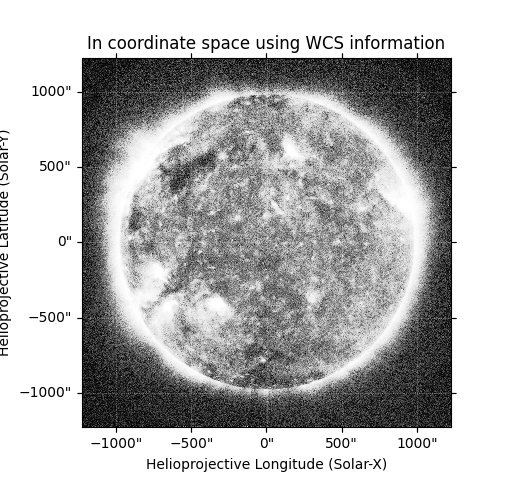
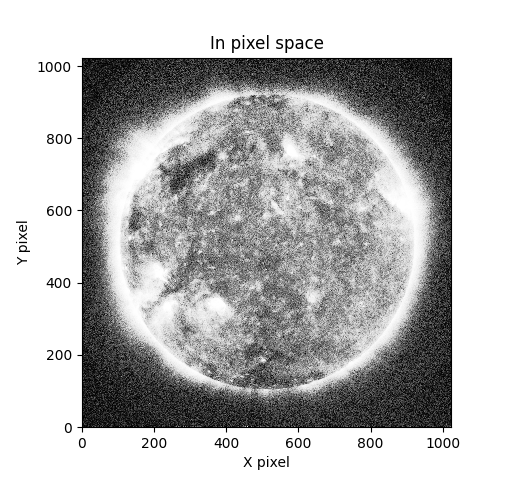
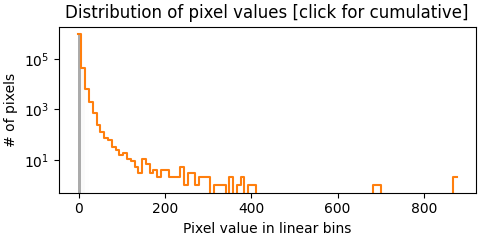
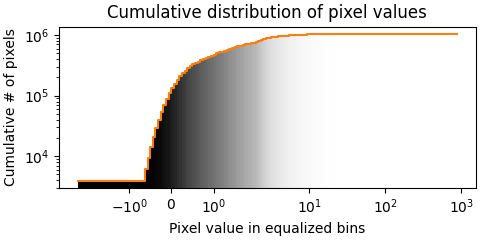

In [104]:
fits_0094

In [184]:
#skycoord = SkyCoord(511.5*u.arcsec, 511.5*u.arcsec, frame=frames.Helioprojective(observer='earth', obstime='2011-01-01T00:00:02.120'))
x=511.5
y=511.5

skycoord=fits_0094.pixel_to_world(x*u.pix,y*u.pix)

print('Original:',skycoord)
# a=skycoord.transform_to(frames.HeliographicStonyhurst(obstime='2011-01-01T00:00:02.120'))
b_1=skycoord.transform_to(frames.HeliographicCarrington(obstime='2011-01-01T00:00:02.120'))
b_2=skycoord.transform_to(frames.HeliographicCarrington(obstime='2011-01-15T00:00:02.120'))

print('B_1:',b_1)
print('B_2:',b_1)

c= b_2.transform_to(frames.Helioprojective(obstime='2011-05-30T00:00:02.120'))
print('C:',c)

Original: <SkyCoord (Helioprojective: obstime=2011-01-01T00:00:02.120, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-01-01T00:00:02.120, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.06573222, -2.97455, 1.47100663e+11)>): (Tx, Ty) in arcsec
    (1.5467383e-27, 0.)>
B_1: <SkyCoord (HeliographicCarrington: obstime=2011-01-01T00:00:02.120, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-01-01T00:00:02.120, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.06573222, -2.97455, 1.47100663e+11)>): (lon, lat, radius) in (deg, deg, m)
    (255.34462, -2.97455, 6.96e+08)>
B_2: <SkyCoord (HeliographicCarrington: obstime=2011-01-01T00:00:02.120, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-01-01T00:00:02.120, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.06573222, -2.97455, 1.47100663e+11)>): (lon, lat, radius) in (deg, deg, m)
    (255.34462, -2.97455, 6.96e+08)>
C:

In [217]:
#skycoord = SkyCoord(511.5*u.arcsec, 511.5*u.arcsec, frame=frames.Helioprojective(observer='earth', obstime='2011-01-01T00:00:02.120'))
x=511.5
y=511.5

skycoord=fits_0094.pixel_to_world(x*u.pix,y*u.pix)

print(skycoord)
a=skycoord.transform_to(frames.HeliographicStonyhurst(obstime='2011-01-01T00:00:02.120'))
b=skycoord.transform_to(frames.HeliographicCarrington(obstime='2011-01-01T00:00:02.120'))

print(a)
print(b)


<SkyCoord (Helioprojective: obstime=2011-01-01T00:00:02.120, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-01-01T00:00:02.120, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.06573222, -2.97455, 1.47100663e+11)>): (Tx, Ty) in arcsec
    (1.5467383e-27, 0.)>
<SkyCoord (HeliographicStonyhurst: obstime=2011-01-01T00:00:02.120, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.06573222, -2.97455, 6.96e+08)>
<SkyCoord (HeliographicCarrington: obstime=2011-01-01T00:00:02.120, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-01-01T00:00:02.120, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.06573222, -2.97455, 1.47100663e+11)>): (lon, lat, radius) in (deg, deg, m)
    (255.34462, -2.97455, 6.96e+08)>


In [140]:
print(fits_0094.pixel_to_world(0*u.pix,0*u.pix))
print(fits_0094.pixel_to_world(511.5*u.pix,511.5*u.pix))
print(fits_0094.pixel_to_world(300*u.pix,300*u.pix))
print(fits_0094.pixel_to_world(400*u.pix,400*u.pix))

<SkyCoord (Helioprojective: obstime=2011-01-01T00:00:02.120, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-01-01T00:00:02.120, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.06573222, -2.97455, 1.47100663e+11)>): (Tx, Ty) in arcsec
    (-1227.58550595, -1227.56376575)>
<SkyCoord (Helioprojective: obstime=2011-01-01T00:00:02.120, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-01-01T00:00:02.120, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.06573222, -2.97455, 1.47100663e+11)>): (Tx, Ty) in arcsec
    (1.5467383e-27, 0.)>
<SkyCoord (Helioprojective: obstime=2011-01-01T00:00:02.120, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-01-01T00:00:02.120, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.06573222, -2.97455, 1.47100663e+11)>): (Tx, Ty) in arcsec
    (-507.59897531, -507.59743829)>
<SkyCoord (Helioprojective: obstime=2011-01-01T00:00:02.120, rsun=6960

In [137]:
import time
start_time = time.time()
for i in range(512-100,512+100):
    for j in range(512-100,512+100):
        coord_magnet=fits_magnet.pixel_to_world(i*u.pix, j*u.pix)
        # coord_0094=fits_0094.pixel_to_world(i*u.pix, j*u.pix)
print(time.time()-start_time)

print(coord_magnet)
print(coord_0094)

KeyboardInterrupt: 

In [94]:
coord=aia.pixel_to_world(500*u.pix, 300*u.pix)
print(coord)

<SkyCoord (Helioprojective: obstime=2010-12-31T23:58:10.200, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2010-12-31T23:58:10.200, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.05567575, -2.974446, 1.47100578e+11)>): (Tx, Ty) in arcsec
    (-23.15486441, -426.48762887)>


In [2]:
import cv2 
import numpy as np
import os

In [ ]:
mag_max = 1000
mag_min = -1000 

def fits_to_rgb(id):
    fits_magnet,_ = get_modal_dir("magnet",date_id=id)
    fits_magnet = sunpy.map.Map(fits_magnet)
    data = fits_magnet.data #

    norm_array = (data-mag_min)/(mag_max-mag_min)
    colormap = plt.get_cmap('RdBu_r')
    colored_array = colormap(norm_array)
    rgb_array = (colored_array[:, :, :3] * 255).astype(np.uint8)
    return rgb_array

def write_video(img,output_video,frame_rate=30):
      #mp4
    h,t,W,H = img.shape

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter(output_video, fourcc, frame_rate, (W, H))

    for i in range(t):
        frame = img[i]
        if c == 1:
            frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)  # 将单通道图像转换为三通道
        video.write(frame)

    video.release()

      



# def write_video(img_HD, syneth):
        
#         frame = np.array(255.0 * syneth[:, :, ::-1], dtype=np.uint8)
#         video_writer.write(frame)

#         frame_cat = np.concatenate([img_HD, syneth], axis=1)
#         frame_cat = np.array(255.0 * frame_cat[:, :, ::-1], dtype=np.uint8)
#         video_writer_cat.write(frame_cat)